# Linear Regressing using Pytorch

This is a simple demonstration of regression using pytorch where we use a dummy dataset. We will first initialize the model and see how it performs without any training. Then we will train the model and see the difference.

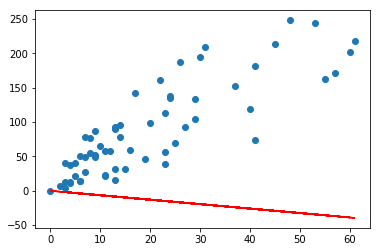

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading data and converting it to numpy array
data = pd.read_csv("data.csv")
x = data.iloc[:,0].values  
y = data.iloc[:,1].values

# This step is for making the numpy array of suitable shape
x = np.asarray([x]).T
y = np.asarray([y]).T

# Converting numpy array to torch tensor so that we can feed this to the model
x_data = Variable(torch.from_numpy(x).float())
y_data = Variable(torch.from_numpy(y).float())

# Defining our model, in this case its a simple linear regression model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, inp):
        y_pred = self.linear(inp)
        return y_pred

# Initializing our model
model = Model()

# Getting the output to see how our model performs with no training at all
plt.scatter(x,y)
plt.plot(x,model(x_data).data.numpy(), color = 'r')
plt.show()

In [2]:
lr = 0.001
epochs = 500

# Defining the loss function and optimiser for our model
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Running the training loop
for epoch in range(epochs):
    # Getting the output (forward propagation)
    y_pred = model(x_data)
    
    # Calculating the loss
    loss = criterion(y_pred, y_data)
    
    # We first make all the gradients 0 because pytorch accumulates all the previous gradients
    # Then we perform backpropagation which calculates all the gradients
    # Finally we update the weights using those gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print ('Epoch [%d/%d], Loss: %.4f'%(epoch+1, epochs, loss.data[0]))

print("Training Completed!")

Epoch [100/500], Loss: 1389.5441
Epoch [200/500], Loss: 1373.5714
Epoch [300/500], Loss: 1359.9391
Epoch [400/500], Loss: 1348.3037
Epoch [500/500], Loss: 1338.3728
Training Completed!


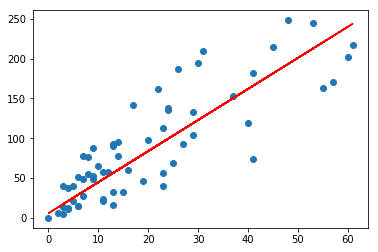

In [3]:
# Finally we see how our model has been trained 
plt.scatter(x,y)
plt.plot(x,model(x_data).data.numpy(), color = 'r')
plt.show()